GOAL: use ML to develop a model that predicts the insurance cost based on the features (age,sex,bmi,children,smoker,region,charges). This is a Regression Problem

dependent variable: the insurance cost
independent variable: the features (age, sex, bmi, children, smokers, region, charges)

# Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset

### create matrix of features (independent variable) & Target variable (dependent variable)

In [2]:
dataset = pd.read_csv('../data/insurance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [4]:
print("Summary Statistics of numerical features for Dataframe are as follows: ")
print("-"*100)
dataset.describe()

Summary Statistics of numerical features for Dataframe are as follows: 
----------------------------------------------------------------------------------------------------


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
print("Summary Statistics of categorical features for Dataframe are as follows: ")
print("-"*100)
dataset.describe(include='object').T

Summary Statistics of categorical features for Dataframe are as follows: 
----------------------------------------------------------------------------------------------------


,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


# Data preprocessing

<Figure size 600x600 with 0 Axes>

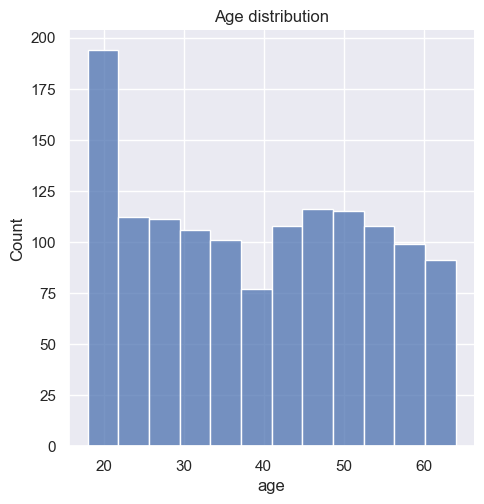

In [6]:
# age distribution
import seaborn as sns
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dataset['age'])
plt.title("Age distribution")
plt.show()



### sex  distribution

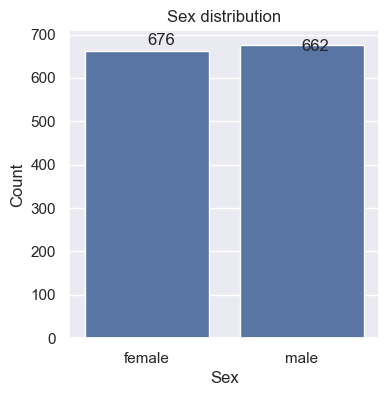

In [7]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='sex', data=dataset)

counts = dataset['sex'].value_counts()

for i, count in enumerate(counts):
    ax.text(i,count, str(count))

plt.title("Sex distribution")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### bmi distribution

<Figure size 600x600 with 0 Axes>

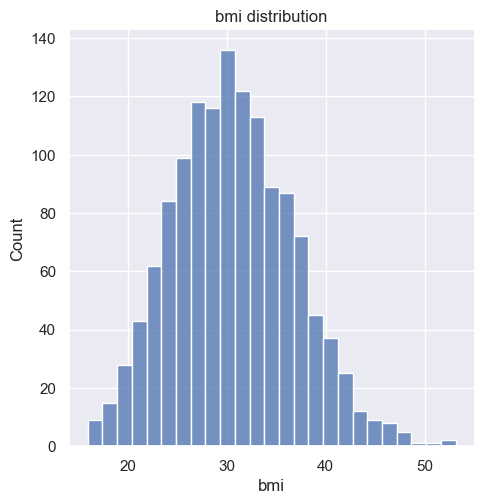

In [8]:
plt.figure(figsize=(6,6))
sns.displot(dataset['bmi'])
plt.title('bmi distribution')
plt.show()

# Encoding the categorical data

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_feature = [1,4,5]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_feature)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 1.0 ... 18 33.77 1]
 [0.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


# Split the dataset into training set and test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Print the scaled training and test sets
print(X_train)
print(X_test)

[[ 1.00187091 -1.00187091  0.51165658 ... -0.48504738 -0.16333584
  -0.05277353]
 [-0.99813258  0.99813258  0.51165658 ... -1.12211862  0.75921189
  -0.05277353]
 [ 1.00187091 -1.00187091  0.51165658 ...  0.50595232  0.46978515
  -0.05277353]
 ...
 [ 1.00187091 -1.00187091 -1.95443593 ...  1.42616633 -1.13932885
  -0.88318056]
 [ 1.00187091 -1.00187091  0.51165658 ... -1.40526139  0.75098954
  -0.88318056]
 [ 1.00187091 -1.00187091  0.51165658 ... -0.343476   -1.15495132
  -0.88318056]]
[[-0.99813258  0.99813258  0.51165658 ... -1.19290431 -0.37382802
  -0.05277353]
 [ 1.00187091 -1.00187091  0.51165658 ...  0.36438093 -0.1271575
   0.7776335 ]
 [-0.99813258  0.99813258 -1.95443593 ...  1.49695202  0.1260909
   1.60804053]
 ...
 [ 1.00187091 -1.00187091  0.51165658 ... -0.27269031  0.86774692
   0.7776335 ]
 [ 1.00187091 -1.00187091  0.51165658 ... -0.62661877 -0.43631788
  -0.88318056]
 [ 1.00187091 -1.00187091  0.51165658 ...  1.6385234  -0.91814762
  -0.88318056]]


In [14]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 11) (1070, 11) (268, 11)


In [15]:
print(y.shape, y_train.shape, y_test.shape)

(1338,) (1070,) (268,)


# Training the multiple linear regression model on the training set

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting the Test set results

In [17]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[ 3601.44  2639.04]
 [ 9508.92  8219.2 ]
 [39172.4  46130.53]
 [ 4786.75  1646.43]
 [ 9312.58  6112.35]
 [13722.2  12430.95]
 [ 4291.83  5354.07]
 [14913.45 10601.41]
 [10437.96 13415.04]
 [33992.93 24667.42]
 [ 5743.52  6402.29]
 [11979.28 10797.34]
 [ 8440.96  9566.99]
 [ 8742.8   6238.3 ]
 [10693.44  7348.14]
 [ 7071.09  4751.07]
 [ 1417.52  1632.56]
 [ 7171.34  7077.19]
 [ 7597.04 14358.36]
 [11809.77  8124.41]
 [ 8308.56  7626.99]
 [33148.38 23401.31]
 [15469.68 13635.64]
 [31556.31 21472.48]
 [12259.53  8457.82]
 [16992.89 14235.07]
 [29996.41 18767.74]
 [10685.06 24915.05]
 [ 4272.99  2254.8 ]
 [14336.62  9704.67]
 [ 8004.63  6500.24]
 [12889.26 10601.63]
 [ 7325.75  4738.27]
 [ 3531.48  2789.06]
 [11370.64 12479.71]
 [ 6611.97  3393.36]
 [ 5118.44  1534.3 ]
 [12313.95  9722.77]
 [37395.26 28868.66]
 [10083.34  7682.67]
 [35210.04 41661.6 ]
 [  780.19  2585.85]
 [ 8399.41  7729.65]
 [ 9388.33  5630.46]
 [ 4531.48 10795.94]
 [ 7992.73  5488.26]
 [ 8991.24  4673.39]
 [12748.99 30

In [18]:
print(regressor.predict([[1, 0, 0, 1, 0, 0, 0, 1, 19, 27.9, 0]]))

[-3.53e+16]


# Visualize the training set results